In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

list_names = ['User3', 'User4', 'User5', 'User6']

#list_names = ['User1','User3', 'User4', 'User5', 'User6', 'User7']
nbUsers = len(list_names)

list_alpha = [0, 0.25, 0.5, 0.75, 1]#, 0.05, 0.1, 0.15, 0.2, 0.3]
nbAlpha = len(list_alpha)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

In [5]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [6]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [7]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [8]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(0, 38):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            #meanUsers.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)+'.Beta.'+str(list_beta[paramB]+'.Gamma.'+str(list_gamma[paramB]))] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [9]:
analysisPerScale.head()

Beta  Gamma  Tolerance   User      large     medium      small
Tolerance                                                                
0          1.05    0.0          0  User6   2.917740   9.687980   8.023963
300        1.05    0.0        300  User6   9.432082  21.602187  16.478925
350        1.05    0.0        350  User6  11.051212  24.092685  18.518776
400        1.05    0.0        400  User6  12.483089  26.916653  20.482169
450        1.05    0.0        450  User6  13.683822  29.904660  22.997319

In [10]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [11]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+'NoCond.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [12]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               44.364212   
1       1                  0.0               36.064857   
2       2                  0.0               84.629978   
3       3                  0.0               67.729040   
4       4                  0.0               10.277100   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               43.822687               43.822687               43.778237   
1               30.467671               25.601157               19.489829   
2               83.086711               81.734500               82.788822   
3               69.329430               69.936640               70.475260   
4               11.707100               11.707100               11.707100   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               43.778237               43.823550               43.834050   
1               18.312386               18.179943               18.560143   
2               84.451378               82.465233               79.462600   
3               71.580450               72.107210               72.443010   
4               11.707100               11.707100               11.707100   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               43.860625  ...              35.997312              35.997312   
1               19.296243  ...              28.948793              30.815679   
2               72.645022  ...              19.163810              19.219277   
3               72.443010  ...              43.870303              44.508723   
4               11.707100  ...              52.294593              52.294593   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              35.997312              35.997312              35.997312   
1              33.474893              35.013036              39.002522   
2              21.087121              22.923055              26.657977   
3              46.755793              50.728963              55.653833   
4              54.549636              58.039351              61.322779   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              35.997312  obj0  small      Touch  User6  
1              40.283679  obj0  small      Raise  User6  
2              27.777410  obj0  small       Pull  User6  
3              59.103643  obj0  small       Push  User6  
4              64.657022  obj0  small  Push Down  User6  

[5 rows x 77 columns]

In [14]:
meanPerScale.tail()

Beta  Gamma      large     medium      small
450  1.05    0.0  19.433814  41.536198  29.784078
400  1.05    0.0  17.913753  37.759545  27.076640
350  1.05    0.0  16.166035  33.141325  24.240438
300  1.05    0.0  14.502575  29.293208  21.210127
0    1.05    0.0   4.186802  10.874147   7.701955

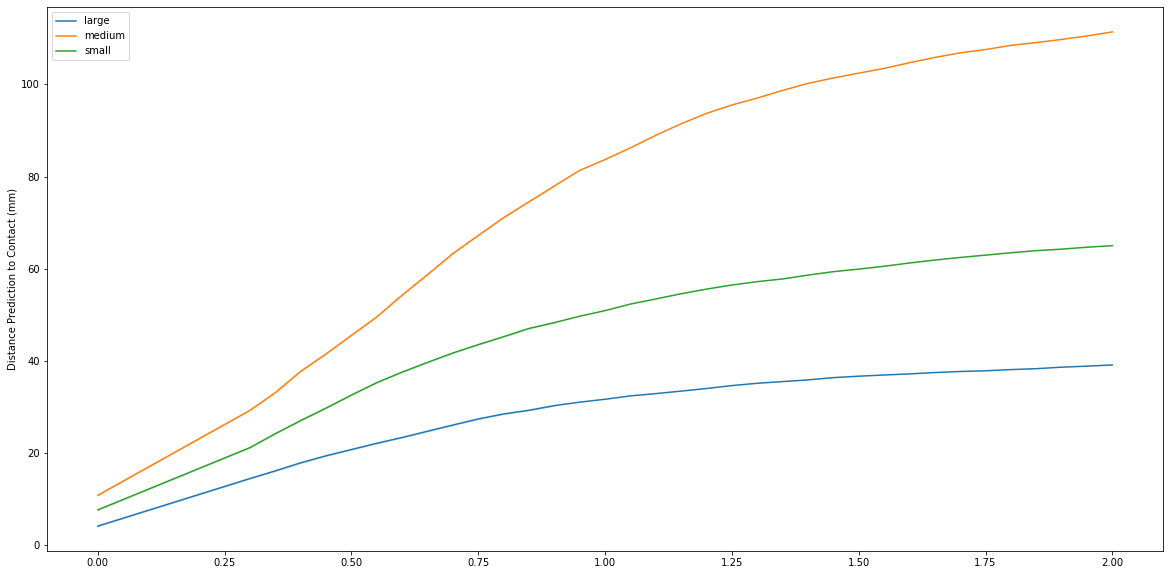

In [15]:
plt.figure(figsize = (20,10))
cond = (meanPerScale['Beta'] == 1.05) & (meanPerScale['Gamma'] == 0)
toleranceplt = meanPerScale.index/1000
sns.lineplot(x = toleranceplt , y = 'large', data = meanPerScale, label = 'large')
sns.lineplot(x = toleranceplt, y = 'medium', data = meanPerScale, label = 'medium')#[cond])
sns.lineplot(x = toleranceplt, y = 'small', data = meanPerScale, label = 'small')#[cond])
plt.ylabel('Distance Prediction to Contact (mm)')
plt.xlabel = ('Time')
plt.legend()

In [14]:
globalAnalysis

Alpha  Beta  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  \
Tolerance                                                                  
0            0.3   NaN    0.000000    0.000000     0.000000     0.000000   
300          0.3   NaN   47.751246   47.751246    37.062800    31.588137   
350          0.3   NaN   53.101608   53.101608    38.644562    34.526004   
400          0.3   NaN   77.747538   77.747538    43.905104    40.742544   
450          0.3   NaN   81.980962   81.980962    45.059367    45.566594   
500          0.3   NaN   85.781585   85.781585    49.699142    51.567531   
550          0.3   NaN  102.508208  102.508208    54.462476    55.176994   
600          0.3   NaN  103.677238  103.677238    59.298607    61.106070   
650          0.3   NaN  103.948846  103.948846    63.729827    62.901076   
700          0.3   NaN  109.503015  109.503015    65.572327    66.784644   
750          0.3   NaN  111.289631  111.289631    70.931211    68.550157   
800          0.3   NaN  114.083869  114.083869    72.230327    72.832393   
850          0.3   NaN  112.394508  112.394508    75.117402    73.478663   
900          0.3   NaN  129.841669  129.841669    77.376528    76.317985   
950          0.3   NaN  129.173715  129.173715    81.021599    77.246550   
1000         0.3   NaN  129.616954  129.616954    80.600017    82.061335   
1050         0.3   NaN  130.271162  130.271162    83.438800    84.955150   
1100         0.3   NaN  130.905877  130.905877    84.836975    87.914187   
1150         0.3   NaN  130.853885  130.853885    85.759429    92.117141   
1200         0.3   NaN  131.215962  131.215962    96.261183    97.650972   
1250         0.3   NaN  131.619885  131.619885    99.460525   100.400017   
1300         0.3   NaN  129.261062  129.261062   126.193271   103.701287   
1350         0.3   NaN  129.500069  129.500069   128.240387   109.432859   
1400         0.3   NaN  174.445600  174.445600   130.966621   111.441915   
1450         0.3   NaN  174.505546  174.505546   131.635200   110.753757   
1500         0.3   NaN  174.505546  174.505546   133.976150   112.008157   
1550         0.3   NaN  174.505546  174.505546   135.332046   114.581135   
1600         0.3   NaN  173.739200  173.739200   136.404158   116.079467   
1650         0.3   NaN  173.617615  173.617615   136.804904   116.143798   
1700         0.3   NaN  173.689685  173.689685   136.862179   117.362906   
...          ...   ...         ...         ...          ...          ...   
550          NaN   0.0   36.563888   38.292150    42.112559    43.618618   
600          NaN   0.0   35.087138   36.815401    44.270710    46.503365   
650          NaN   0.0   38.644801   40.838257    47.851152    50.387785   
700          NaN   0.0   37.837038   39.519894    50.015862    53.518091   
750          NaN   0.0   53.908794   55.591650    51.115462    55.583403   
800          NaN   0.0   61.868456   64.751988    51.115490    59.085357   
850          NaN   0.0   73.563581   76.447113    53.259638    63.732637   
900          NaN   0.0   78.937419   80.741369    54.329348    71.070602   
950          NaN   0.0   77.797206   80.212906    58.633576    77.509418   
1000         NaN   0.0   89.726800   91.192706    66.972017    82.408773   
1050         NaN   0.0   95.303688   98.899944    68.483233    84.613492   
1100         NaN   0.0  100.977963  105.401450    69.081310    90.440332   
1150         NaN   0.0  106.700931  108.382319    74.236550    90.658453   
1200         NaN   0.0  110.954000  112.444256    77.836552    92.244475   
1250         NaN   0.0  111.324169  112.814425    77.107540    93.497214   
1300         NaN   0.0  113.251025  115.080863    79.899936    95.074238   
1350         NaN   0.0  114.528069  115.509000    81.658400    97.767299   
1400         NaN   0.0  115.241863  116.222794    82.201828    99.738322   
1450         NaN   0.0  115.620125  116.474281    85.647747   101.699336   
1500         NaN   0.0  125.990494  126.844650    91.689814

In [15]:
analysisPerTask.head()

Alpha  Beta  Gamma       Pull       Push  Push Down      Raise  \
Tolerance                                                                   
0            0.3   NaN    NaN  -2.038616  -1.474538  -2.025569  -0.907184   
300          0.3   NaN    NaN   7.749825  19.161237  18.442976  23.184617   
350          0.3   NaN    NaN   9.849285  21.397056  21.807450  26.652059   
400          0.3   NaN    NaN  12.178474  24.175709  26.256477  31.807786   
450          0.3   NaN    NaN  14.553571  26.918916  28.920888  34.632010   
500          0.3   NaN    NaN  16.657280  30.762691  31.247219  37.291128   
550          0.3   NaN    NaN  19.063239  34.810624  33.261783  39.720885   
600          0.3   NaN    NaN  21.277886  37.408872  35.497731  43.137984   
650          0.3   NaN    NaN  24.504061  41.096439  37.503355  45.957244   
700          0.3   NaN    NaN  28.037453  43.295068  39.036491  49.030368   
750          0.3   NaN    NaN  31.134914  46.026452  41.096572  52.286289   
800          0.3   NaN    NaN  33.059149  47.934958  43.025883  55.139675   
850          0.3   NaN    NaN  35.557773  52.267553  46.278963  57.621509   
900          0.3   NaN    NaN  38.968388  54.614767  47.738458  60.467268   
950          0.3   NaN    NaN  41.327789  56.456851  49.012385  62.996903   
1000         0.3   NaN    NaN  43.884954  57.829455  50.713028  66.515961   
1050         0.3   NaN    NaN  46.226878  59.515888  52.143003  69.181407   
1100         0.3   NaN    NaN  47.874745  61.571562  54.556740  71.944952   
1150         0.3   NaN    NaN  48.854306  63.222069  55.795304  74.906537   
1200         0.3   NaN    NaN  50.713848  64.418503  56.518089  78.897878   
1250         0.3   NaN    NaN  52.162165  66.281340  58.575498  81.897827   
1300         0.3   NaN    NaN  53.371729  68.154075  60.189992  86.618189   
1350         0.3   NaN    NaN  54.118535  69.641144  61.221092  87.810241   
1400         0.3   NaN    NaN  54.736966  70.420112  62.320248  91.771237   
1450         0.3   NaN    NaN  55.725176  71.486218  63.824437  92.848627   
1500         0.3   NaN    NaN  56.415201  72.590342  64.950134  93.853166   
1550         0.3   NaN    NaN  57.121850  75.328109  67.448784  95.042292   
1600         0.3   NaN    NaN  57.963889  76.405990  68.377025  95.777463   
1650         0.3   NaN    NaN  58.646496  77.613142  69.198992  96.414417   
1700         0.3   NaN    NaN  59.682572  78.294630  74.831940  97.391512   
...          ...   ...    ...        ...        ...        ...        ...   
550          NaN   0.0    0.0  36.942038  29.175190  24.291671  41.152590   
600          NaN   0.0    0.0  39.045352  31.823054  28.174784  43.901733   
650          NaN   0.0    0.0  41.300373  34.348545  33.012708  46.964078   
700          NaN   0.0    0.0  43.494552  38.321197  36.452212  48.861186   
750          NaN   0.0    0.0  46.090674  43.598809  40.626870  52.469839   
800          NaN   0.0    0.0  48.271549  46.722809  45.605902  54.106938   
850          NaN   0.0    0.0  49.686051  49.255836  48.865305  56.564601   
900          NaN   0.0    0.0  51.093633  51.110498  51.828441  59.699635   
950          NaN   0.0    0.0  52.597598  52.564063  55.816489  62.214155   
1000         NaN   0.0    0.0  54.428334  53.598595  57.381320  63.793311   
1050         NaN   0.0    0.0  55.338583  54.498056  59.714448  65.343852   
1100         NaN   0.0    0.0  55.969071  55.473257  60.898856  66.544363   
1150         NaN   0.0    0.0  56.573953  56.376670  61.628915  67.825904   
1200         NaN   0.0    0.0  57.221830  57.146970  63.441964  68.969942   
1250         NaN   0.0    0.0  58.217645  57.847460  65.139025  70.045881   
1300         NaN   0.0    0.0  58.777008  58.366922  66.131592  71.295800   
1350         NaN   0.0    0.0  59.539046  58.795399  67.000730  72.254527   
1400         NaN   0.0    0.0  60.223148  59.713541  67.865991  72.934985   
1450         NaN   0.0    0.0  60.789369  60.349173  68.715345  73.876930   
1500   

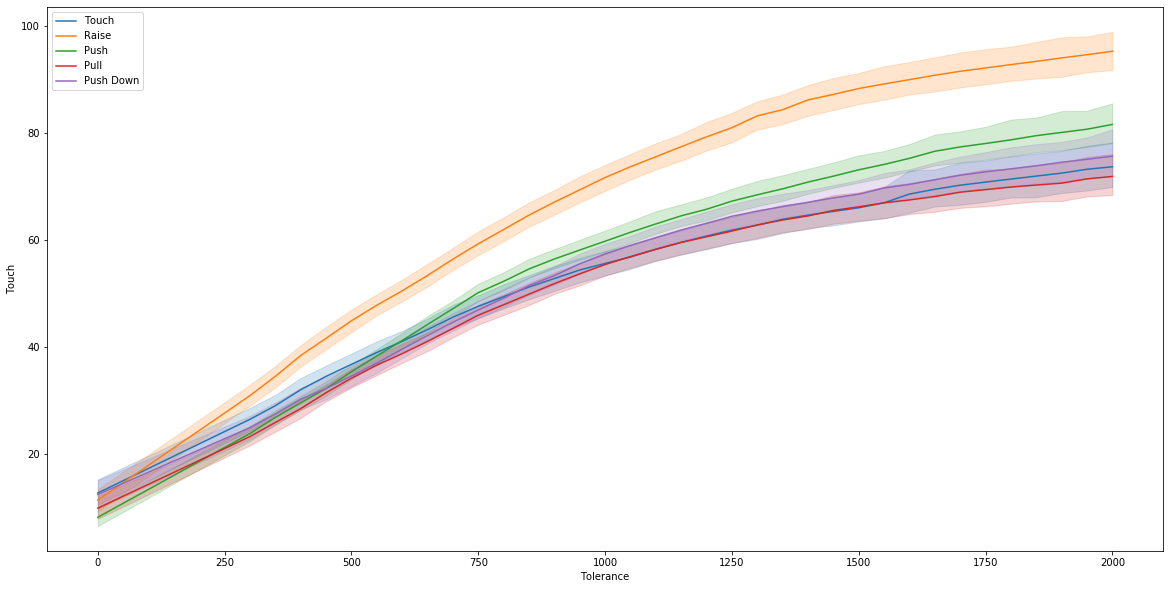

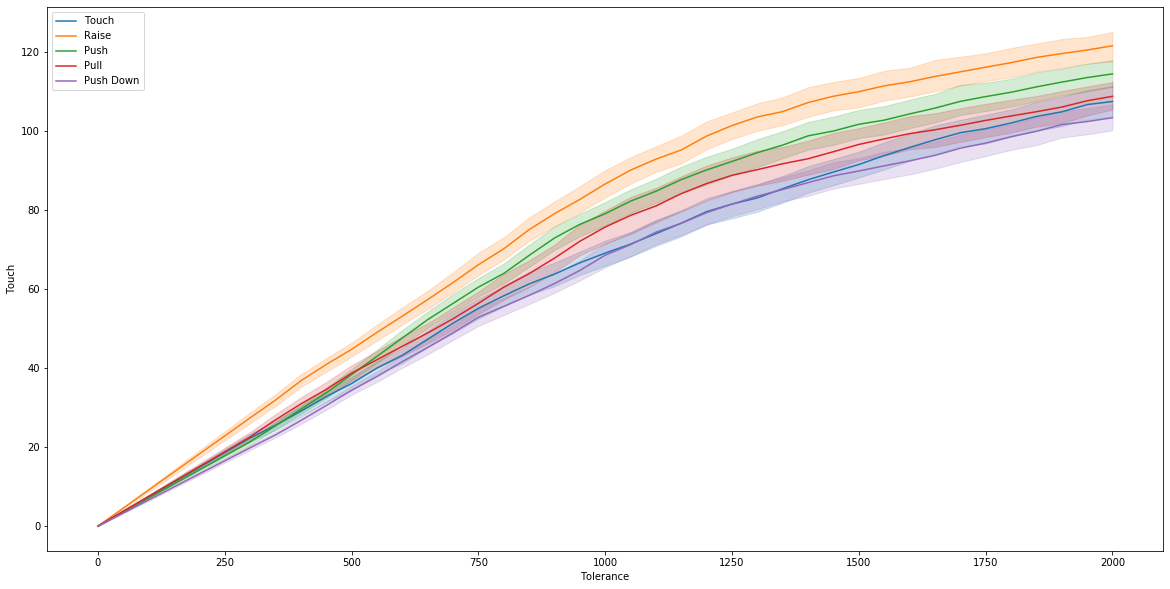

In [16]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

#plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')


In [16]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.1000  \
0       0                  0.0               44.364212   
1       1                  0.0               36.064857   
2       2                  0.0               84.629978   
3       3                  0.0               67.729040   
4       4                  0.0               10.277100   

   DistBoneInTolTime.1050  DistBoneInTolTime.1100  DistBoneInTolTime.1150  \
0               43.822687               43.822687               43.778237   
1               30.467671               25.601157               19.489829   
2               83.086711               81.734500               82.788822   
3               69.329430               69.936640               70.475260   
4               11.707100               11.707100               11.707100   

   DistBoneInTolTime.1200  DistBoneInTolTime.1250  DistBoneInTolTime.1300  \
0               43.778237               43.823550               43.834050   
1               18.312386               18.179943               18.560143   
2               84.451378               82.465233               79.462600   
3               71.580450               72.107210               72.443010   
4               11.707100               11.707100               11.707100   

   DistBoneInTolTime.1350  ...  DistanceInTolTime.700  DistanceInTolTime.750  \
0               43.860625  ...              35.997312              35.997312   
1               19.296243  ...              28.948793              30.815679   
2               72.645022  ...              19.163810              19.219277   
3               72.443010  ...              43.870303              44.508723   
4               11.707100  ...              52.294593              52.294593   

   DistanceInTolTime.800  DistanceInTolTime.850  DistanceInTolTime.900  \
0              35.997312              35.997312              35.997312   
1              33.474893              35.013036              39.002522   
2              21.087121              22.923055              26.657977   
3              46.755793              50.728963              55.653833   
4              54.549636              58.039351              61.322779   

   DistanceInTolTime.950   Obj  Scale       Task   User  
0              35.997312  obj0  small      Touch  User6  
1              40.283679  obj0  small      Raise  User6  
2              27.777410  obj0  small       Pull  User6  
3              59.103643  obj0  small       Push  User6  
4              64.657022  obj0  small  Push Down  User6  

[5 rows x 77 columns]

In [45]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']

for tol in range(300, 2050, 50):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    

In [47]:
tol = 300
tasks[gest], scales[size], list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)]

('Push Down', 'large', 'User6', 94      6.244096
 99      6.128856
 104     2.160229
 109     0.000000
 114     2.679796
 119    15.746139
 124    19.338803
 129    25.827769
 134     6.433916
 Name: DistInTolTime.300, dtype: float64)

In [61]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], scales[size]] = mean/nbUsers        

In [59]:
objects

['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']

In [ ]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500
tol6 = 1750
tol7 = 2000

cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(1,7, figsize=(30,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    
    
g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    mean = 0
    for phalanx in range(0, 38):
        mean += meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'WholeHand'] = mean/38
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['WholeHand']
    

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, WholeHands')
plt.show()

In [333]:
meanAlphaUsers = pd.DataFrame()
for alphi in range(0, nbAlpha):
    for tol in range(0, 50):
        meanAlphaBis = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Alpha'] == list_alpha[alphi])
        meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'Alpha'] = list_alpha[alphi]
        
        for j in range(0, 38):
            meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanAlphaBis.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()

        meanAlphaUsers = pd.concat([meanAlphaBis, meanAlphaUsers], axis = 0, sort = True)

In [382]:
meanAlphaHand = pd.DataFrame()
for alphi in range(0, nbAlpha):
#    tol = 300
    for tol in range(0, 50):
        mean = 0
        cond = (meanAlphaUsers.index == meanAlphaUsers.index[tol]) & (meanAlphaUsers['Alpha'] == list_alpha[alphi])
        #print(list_alpha[alphi])
        for phalanx in range(0, 38):
            mean += meanAlphaUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
        
        meanAlphaHand.loc[list_alpha[alphi], meanAlphaUsers.index[tol]] = mean/38


Text(0, 0.5, 'Distance to Contact (mm)')

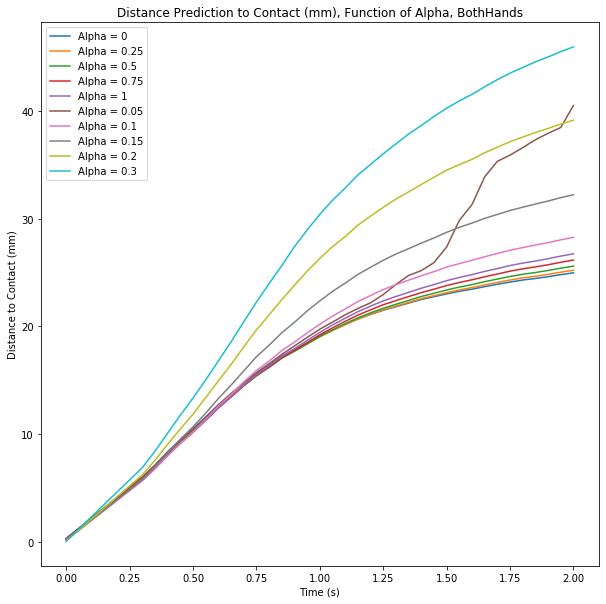

In [394]:
plt.figure(figsize=(10,10))
for i in range(0, len(meanAlphaHand.index)):
    plt.plot(meanAlphaHand.columns[:]/1000, meanAlphaHand.loc[meanAlphaHand.index[i]], label = 'Alpha = ' + str(list_alpha[i]))
    
    
plt.legend()
plt.title('Distance Prediction to Contact (mm), Function of Alpha, BothHands')
plt.xlabel('Time (s)')
plt.ylabel('Distance to Contact (mm)')


Text(0.5, 1, 'HeatMap of Distance to Prediction (mm) as a Function of Alpha')

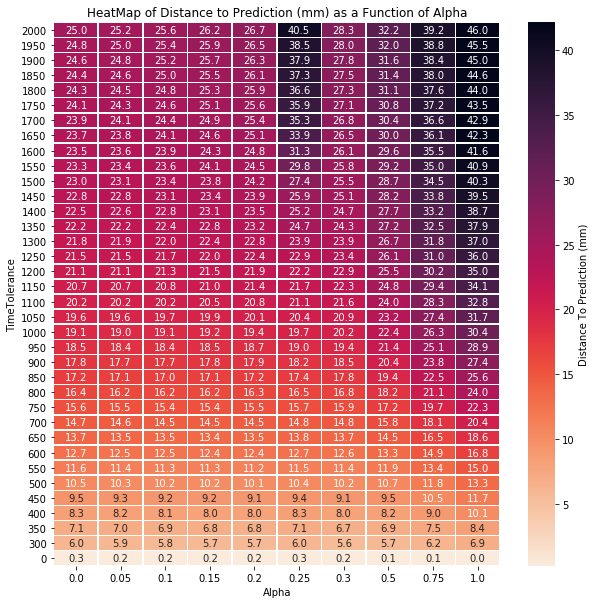

In [383]:
meanAlphaHand = meanAlphaHand.sort_index(ascending = True)
meanAlphaHand = meanAlphaHand.sort_index(axis = 1, ascending = True)

plt.figure(figsize=(10,10))
cmap = sns.cm.rocket_r
sns.heatmap(meanAlphaHand.transpose().sort_index(ascending = False), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, robust = True, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

plt.xlabel('Alpha')
plt.ylabel('TimeTolerance')
plt.title('HeatMap of Distance to Prediction (mm) as a Function of Alpha')


In [358]:
meanAlphaUsers.head()

Alpha  BoneDist.0  BoneDist.1  BoneDist.10  BoneDist.11  BoneDist.12  \
900    0.3   98.106776   97.720249    59.573693    97.337387    98.118150   
850    0.3   94.841245   94.692165    57.865698    92.906979    93.837273   
800    0.3   91.078977   90.776960    54.691286    86.424823    87.211553   
750    0.3   85.468860   85.436739    52.735234    82.125456    83.663131   
700    0.3   80.040285   80.008163    50.139495    75.852048    78.691110   

     BoneDist.13  BoneDist.14  BoneDist.15  BoneDist.16  ...  Phalanx.34  \
900    67.486457    89.058291    89.312772    72.517092  ...   18.433461   
850    62.752455    83.646746    85.931124    68.453572  ...   17.828742   
800    59.803116    78.701498    80.631538    66.688037  ...   17.021450   
750    55.940164    72.737146    77.100587    65.362563  ...   16.065151   
700    53.052362    67.629111    71.901967    62.754912  ...   14.450026   

     Phalanx.35  Phalanx.36  Phalanx.37  Phalanx.4  Phalanx.5  Phalanx.6  \
900    5.357872   12.063027   15.412151  12.725820  22.345671  36.578049   
850    5.076556   11.513858   14.899158  12.201933  21.759529  34.250273   
800    4.897935   10.563488   13.978265  11.772334  20.977504  32.488682   
750    4.655324    9.994795   13.404837  11.295806  20.091837  31.110771   
700    4.239987    9.250995   12.277889  10.842072  19.234486  28.789580   

     Phalanx.7  Phalanx.8  Phalanx.9  
900  26.924681  43.370357  51.962418  
850  25.960359  41.262317  49.879088  
800  24.973899  38.959218  47.235193  
750  23.687952  36.402069  44.540779  
700  23.032818  33.926970  41.641332  

[5 rows x 77 columns]

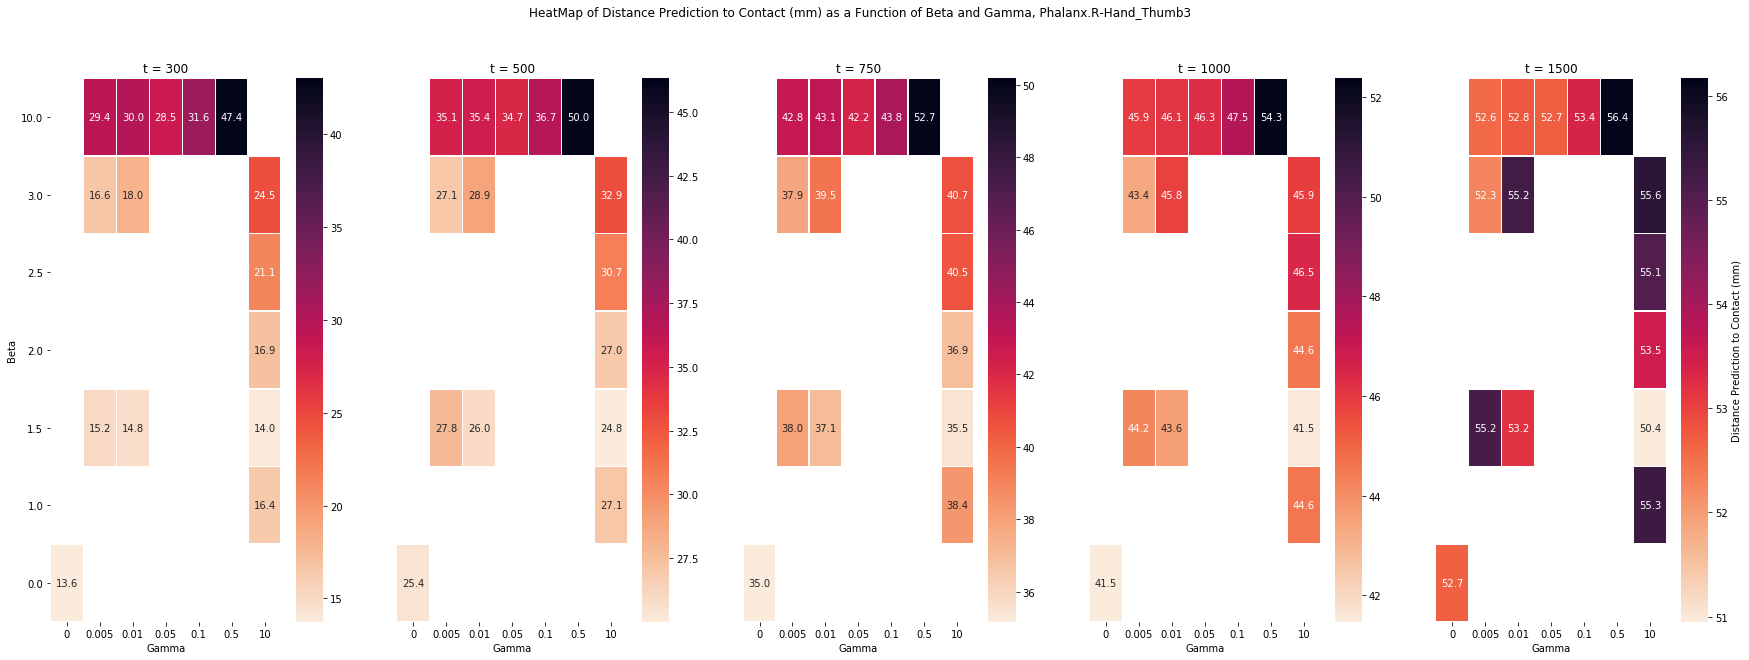

In [262]:
tol = 300
tol2 = 500
tol3 = 750
tol4 = 1000
tol5 = 1500

phalanx = 6
#vmin = 0
#vmax = 50


cmap = sns.cm.rocket_r

f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(30,10))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax1)
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
g1.set_ylabel('Beta')
g1.set_xlabel('Gamma')
ax1.title.set_text('t = '+str(tol))



tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol2) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]


g2 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax2)
g2.set_ylabel('')
g2.set_xlabel('Gamma')#, t = '+str(tol))
g2.set_yticks([])
ax2.title.set_text('t = '+str(tol2))


tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol3) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax3)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g3.set_ylabel('')
g3.set_xlabel('Gamma')#, t = '+str(tol))
g3.set_yticks([])
ax3.title.set_text('t = '+str(tol3))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol4) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g4 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax4)#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g4.set_ylabel('')
g4.set_xlabel('Gamma')#, t = '+str(tol))
g4.set_yticks([])
ax4.title.set_text('t = '+str(tol4))

tableMe = pd.DataFrame()
betaGammaDf = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    cond = (meanUsers.index == tol5) & (meanUsers['Beta'] == list_beta[paramB]) & (meanUsers['Gamma'] == list_gamma[paramB])
    betaGammaDf.loc[paramB, 'Phalanx.'+str(phalanx)] = meanUsers[cond].iloc[0]['Phalanx.'+str(phalanx)]
    
    betaGammaDf.loc[paramB, 'Gamma'] = list_gamma[paramB]
    betaGammaDf.loc[paramB, 'Beta'] = list_beta[paramB]

for param in range(0, nbBetaGamma):
    tableMe.loc[list_beta[param], str(list_gamma[param])] = betaGammaDf.iloc[param]['Phalanx.'+str(phalanx)]

#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, vmin = vmin, vmax = vmax, ax = ax3, cbar_kws = {'label' : 'Distance To Prediction (mm)'})

g5 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = ax5, cbar_kws = {'label' : 'Distance Prediction to Contact (mm)'})


#g3 = sns.heatmap(tableMe.sort_index(ascending = False).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f', cmap = cmap, square = True, robust = True, ax = ax3)
g5.set_ylabel('')
g5.set_xlabel('Gamma')#, t = '+str(tol))
g5.set_yticks([])
ax5.title.set_text('t = '+str(tol5))


# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3,g4,g5]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Beta and Gamma, Phalanx.'+boneNames[phalanx])
plt.show()
